In [108]:
#using unsupervied learning model to predit the average rating for #1 restaurant category in USA
#Neural Networks with 1 layer and 1 neuron

import pandas as pd
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [109]:
#read in dataset
df = pd.read_csv('cleaned_data.csv')
df.head()

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id
0,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA
1,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA
2,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA
3,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg
4,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA


In [88]:
#Standardize Lat, Log, Stars and Review count columns
#columns_to_standardize = ['latitude', 'longitude', 'stars', 'review_count']
#scaler = StandardScaler()
#df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
#df.head()

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id
0,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA
1,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA
2,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA
3,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg
4,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA


In [110]:
#separate American Restaurents with others
df['category'] = df['category'].fillna('')

american_restaurants = df[df['category'].str.contains('American', case=False)]
other_restaurants = df[~df['category'].str.contains('American', case=False)]


In [111]:
#run KMeans model
X = other_restaurants[['latitude', 'longitude', 'stars', 'review_count']]
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

KMeans(n_clusters=30)

In [112]:
labels = kmeans.labels_
labels

array([25, 25, 25, ..., 25, 25, 25], dtype=int32)

In [113]:
#View labels
pd.Series(kmeans.labels_).value_counts()

7     138193
25    134081
19    119557
0     100619
17     85189
24     75344
9      61480
18     41475
27     37417
6      29398
21     24237
13     21226
26     17042
29     14882
2      13439
20     10567
11     10436
8       9247
10      7123
22      6806
28      5042
15      4929
16      4573
3       3584
1       2981
14      2858
12      2754
23      2704
4       2170
5       1752
dtype: int64

In [114]:
#Add labels to the dataframe
labeled_df = other_restaurants.copy()
labeled_df['label'] = labels
labeled_df

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id,label
0,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA,25
1,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA,25
2,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA,25
3,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg,25
4,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA,25
...,...,...,...,...,...,...,...,...,...
1646180,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,35,Mexican,cOh-a-xWgOBP4WHxVp2SOg,oh8jhxBjzl7x9WUh8xHsyA,25
1646181,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,35,Mexican,qBcwQEQPnLxjkw-xbUIF4Q,6nF5PT1c0dF6EpOgQdF2tw,25
1646182,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,35,Mexican,G8fbysnUAUmqq1XWTjMQ4Q,1M78_w4J9f5S8xmUVYyxdQ,25
1646183,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,35,Mexican,JITY01bGbdsiUBznLz9rdg,HI8QwhpeP_ZRY5JZy11VDw,25


In [115]:
#filter top reviewers that rated at least 5 American restaurants
user_reviews_count = american_restaurants.groupby('user_id').size()

users_with_more_than_5_reviews = user_reviews_count[user_reviews_count > 5]

print(users_with_more_than_5_reviews)

user_id
---2PmXbF47D870stH1jqA     8
--8r3pNaZiG1fN8LCHuL_g     7
--KsuCSkGGvDKTbdK9NvIg    15
--Vu3Gux9nPnLcG9yO_HxA     9
--_r6E98SNIrGU7weyNxbw    14
                          ..
zz-2jnao6J1enCmzs7FBoA     6
zz9wGVLClSDHoklHoj2g8w    16
zzBhA0M7NNBMYoWj48h53A    11
zziJLt25YU6dp01sewR-IQ    12
zztkCqqgR6VntYbqio4UTQ     8
Length: 34196, dtype: int64


In [116]:
#get american restaurants id and american restaurant reviewer's id
american_restaurants_ids = american_restaurants['business_id'].unique()
american_restaurants_reviewer_ids = american_restaurants['user_id'].unique()

In [117]:
#create pivot table of each user_id's rating to each label
#pivot_df = labeled_df[labeled_df['user_id'].isin(users_with_more_than_5_reviews.index)].groupby(['user_id', 'label']).mean().reset_index().set_index('user_id').pivot(columns='label', values='stars')
pivot_df = labeled_df[labeled_df['user_id'].isin(users_with_more_than_5_reviews.index)].groupby(['user_id', 'label'])['stars'].mean().unstack()
pivot_df

label,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,4.00,NaN,4.00,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,4.0
--8r3pNaZiG1fN8LCHuL_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.750000,NaN,NaN,NaN,NaN
--KsuCSkGGvDKTbdK9NvIg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,4.0,...,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN
--Vu3Gux9nPnLcG9yO_HxA,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,4.00,NaN,4.5,NaN,NaN,3.5
--_r6E98SNIrGU7weyNxbw,4.25,NaN,NaN,NaN,NaN,NaN,NaN,3.583333,NaN,4.0,...,NaN,NaN,NaN,NaN,4.25,4.000000,NaN,3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,4.00,NaN,3.00,NaN,NaN,NaN,NaN,2.750000,NaN,NaN,...,NaN,NaN,NaN,NaN,4.50,3.500000,NaN,NaN,NaN,NaN
zz9wGVLClSDHoklHoj2g8w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750000,NaN,NaN,...,NaN,NaN,NaN,NaN,4.50,3.454545,NaN,NaN,NaN,NaN
zzBhA0M7NNBMYoWj48h53A,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,NaN,NaN,4.00,NaN,4.0,NaN,NaN,NaN


In [118]:
#Add in one more column of average rating of each user of all clusters
pivot_df['AVG'] = pivot_df.mean(axis=1)
pivot_df

label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,AVG
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,4.00,NaN,4.00,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,4.0,3.857143
--8r3pNaZiG1fN8LCHuL_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,2.750000
--KsuCSkGGvDKTbdK9NvIg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,4.0,...,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,3.750000
--Vu3Gux9nPnLcG9yO_HxA,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,4.00,NaN,4.5,NaN,NaN,3.5,3.937500
--_r6E98SNIrGU7weyNxbw,4.25,NaN,NaN,NaN,NaN,NaN,NaN,3.583333,NaN,4.0,...,NaN,NaN,NaN,4.25,4.000000,NaN,3.5,NaN,NaN,3.902778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,4.00,NaN,3.00,NaN,NaN,NaN,NaN,2.750000,NaN,NaN,...,NaN,NaN,NaN,4.50,3.500000,NaN,NaN,NaN,NaN,3.678571
zz9wGVLClSDHoklHoj2g8w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750000,NaN,NaN,...,NaN,NaN,NaN,4.50,3.454545,NaN,NaN,NaN,NaN,3.884470
zzBhA0M7NNBMYoWj48h53A,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,NaN,4.00,NaN,4.0,NaN,NaN,NaN,3.920000


In [119]:
#fill the nan value with average rating
row_means = pivot_df.mean(axis=1, skipna=True)
pivot_df_filled = pivot_df.apply(lambda row: row.fillna(row_means[row.name]), axis=1)
pivot_df_filled.head()

label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,AVG
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,4.0000,3.857143,4.000000,3.857143,3.857143,3.857143,3.857143,3.500000,3.857143,3.857143,...,3.857143,3.857143,3.857143,3.857143,4.0000,3.857143,3.857143,3.857143,4.000000,3.857143
--8r3pNaZiG1fN8LCHuL_g,2.7500,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,...,2.750000,2.750000,2.750000,2.750000,2.7500,2.750000,2.750000,2.750000,2.750000,2.750000
--KsuCSkGGvDKTbdK9NvIg,3.7500,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,2.500000,3.750000,4.000000,...,3.750000,3.750000,3.750000,4.500000,3.7500,3.750000,3.750000,3.750000,3.750000,3.750000
--Vu3Gux9nPnLcG9yO_HxA,3.9375,3.937500,3.000000,3.937500,3.937500,3.937500,3.937500,3.937500,3.937500,4.000000,...,3.937500,3.937500,3.937500,4.000000,3.9375,4.500000,3.937500,3.937500,3.500000,3.937500
--_r6E98SNIrGU7weyNxbw,4.2500,3.902778,3.902778,3.902778,3.902778,3.902778,3.902778,3.583333,3.902778,4.000000,...,3.902778,3.902778,3.902778,4.250000,4.0000,3.902778,3.500000,3.902778,3.902778,3.902778


In [120]:
X = pivot_df_filled.drop("AVG", axis=1)
y = pivot_df_filled["AVG"]


In [121]:
X

label,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,4.000000,3.857143,4.000000,3.857143,3.857143,3.857143,3.857143,3.500000,3.857143,3.857143,...,3.857143,3.857143,3.857143,3.857143,3.857143,4.000000,3.857143,3.857143,3.857143,4.000000
--8r3pNaZiG1fN8LCHuL_g,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,...,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000
--KsuCSkGGvDKTbdK9NvIg,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,2.500000,3.750000,4.000000,...,3.750000,3.750000,3.750000,3.750000,4.500000,3.750000,3.750000,3.750000,3.750000,3.750000
--Vu3Gux9nPnLcG9yO_HxA,3.937500,3.937500,3.000000,3.937500,3.937500,3.937500,3.937500,3.937500,3.937500,4.000000,...,3.937500,3.937500,3.937500,3.937500,4.000000,3.937500,4.500000,3.937500,3.937500,3.500000
--_r6E98SNIrGU7weyNxbw,4.250000,3.902778,3.902778,3.902778,3.902778,3.902778,3.902778,3.583333,3.902778,4.000000,...,3.902778,3.902778,3.902778,3.902778,4.250000,4.000000,3.902778,3.500000,3.902778,3.902778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,4.000000,3.678571,3.000000,3.678571,3.678571,3.678571,3.678571,2.750000,3.678571,3.678571,...,3.678571,3.678571,3.678571,3.678571,4.500000,3.500000,3.678571,3.678571,3.678571,3.678571
zz9wGVLClSDHoklHoj2g8w,3.884470,3.884470,3.884470,3.884470,3.884470,3.884470,3.884470,3.750000,3.884470,3.884470,...,3.884470,3.884470,3.884470,3.884470,4.500000,3.454545,3.884470,3.884470,3.884470,3.884470
zzBhA0M7NNBMYoWj48h53A,3.500000,3.920000,3.920000,3.920000,3.920000,3.920000,3.920000,3.920000,3.920000,4.500000,...,3.920000,3.920000,3.920000,3.920000,4.000000,3.920000,4.000000,3.920000,3.920000,3.920000


In [122]:
#train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, input_dim=len(X.columns)))
nn_model.compile(loss="MSE", optimizer="adam", metrics=["mse", "mae"])
fit_model = nn_model.fit(X_train, y_train, epochs=50)


Epoch 1/50
787/787 [==============================] - 3s 3ms/step - loss: 0.2366 - mse: 0.2366 - mae: 0.2943
Epoch 2/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0908 - mse: 0.0908 - mae: 0.2240
Epoch 3/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0739 - mse: 0.0739 - mae: 0.2028
Epoch 4/50
787/787 [==============================] - 1s 2ms/step - loss: 0.0550 - mse: 0.0550 - mae: 0.1751
Epoch 5/50
787/787 [==============================] - 1s 2ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1484
Epoch 6/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1211
Epoch 7/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0179 - mse: 0.0179 - mae: 0.0991
Epoch 8/50
787/787 [==============================] - 1s 2ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0813
Epoch 9/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0668
Epoch 10/50
787/787

In [123]:
#save the model
nn_model.save("prediction_model.h5")


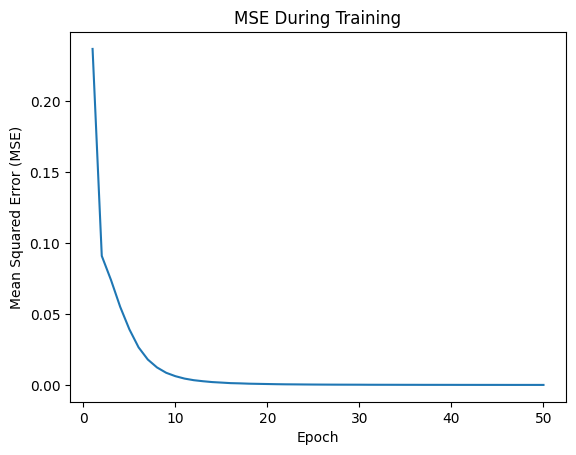

In [124]:
#plot the model
mse_history = fit_model.history['mse']
plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE During Training')
plt.show()

In [125]:
#get r2 score
r2_score(y_test, nn_model.predict(X_test))


263/263 [==============================] - 0s 1ms/step


0.9998071836310756

In [126]:
#get mean absolute error
mean_absolute_error(y_test, nn_model.predict(X_test))


263/263 [==============================] - 0s 2ms/step


0.002557990777123434

In [127]:

loss, mse, mae = nn_model.evaluate(X_test, y_test)


263/263 [==============================] - 0s 1ms/step - loss: 1.5777e-05 - mse: 1.5777e-05 - mae: 0.0026


263/263 [==============================] - 0s 1ms/step


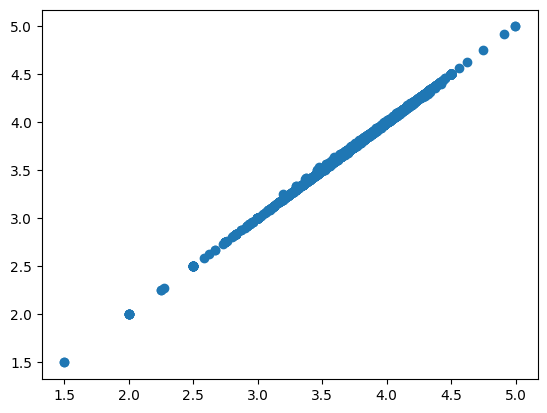

In [128]:
#plot the prediction
plt.scatter(nn_model.predict(X_test), y_test)
